# 1.5.9 Feature Matching
## Brute-Force Matching with SIFT Descriptors and Ratio Test

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
resource_path = os.getcwd() + '/resource/'

In [4]:
img1 = cv2.imread(resource_path + 'im0.png',0) # queryImage
img2 = cv2.imread(resource_path + 'im1.png',0) # trainImage

In [5]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

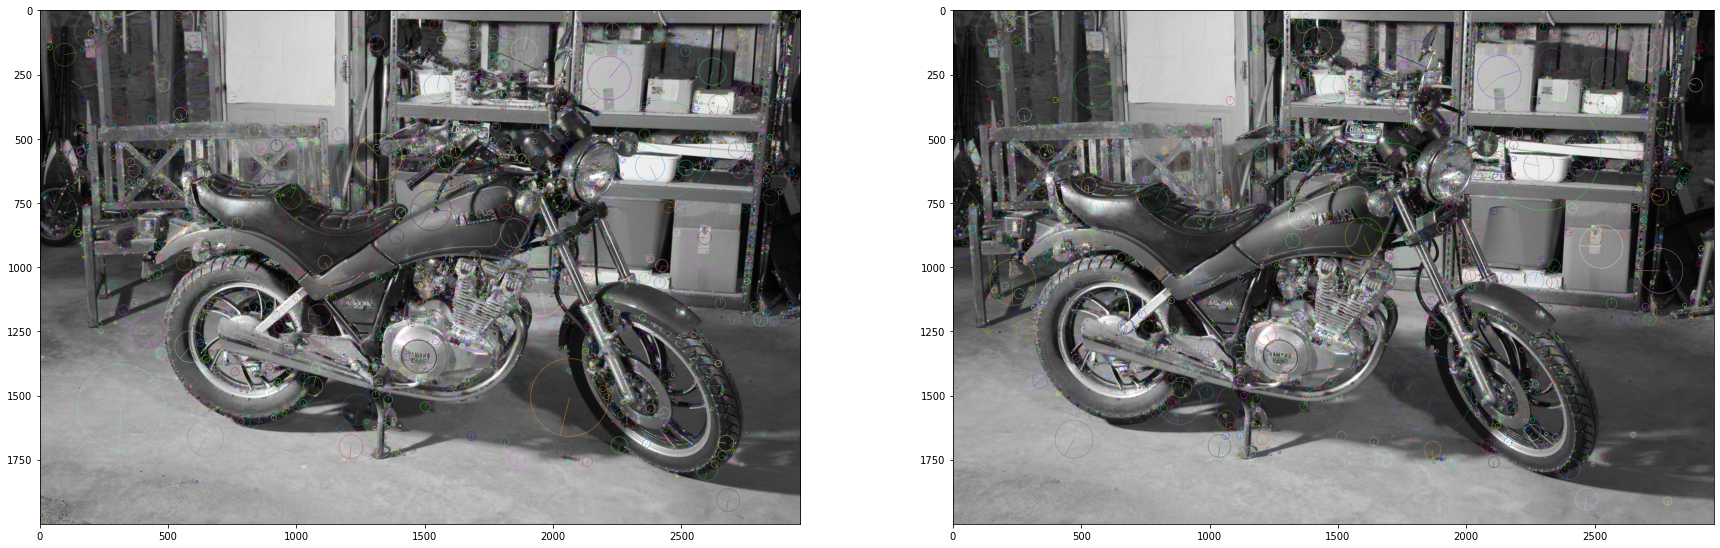

In [7]:
img1v=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,20))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [19]:
kp1

[<KeyPoint 000001E70C693DB0>,
 <KeyPoint 000001E77E8EECC0>,
 <KeyPoint 000001E77E8EE270>,
 <KeyPoint 000001E77C364D20>,
 <KeyPoint 000001E77C364EA0>,
 <KeyPoint 000001E77C364F60>,
 <KeyPoint 000001E77C364F00>,
 <KeyPoint 000001E77C364210>,
 <KeyPoint 000001E77C364990>,
 <KeyPoint 000001E77C364AE0>,
 <KeyPoint 000001E70C6BA390>,
 <KeyPoint 000001E70C6BA600>,
 <KeyPoint 000001E70C6BA450>,
 <KeyPoint 000001E70C6BA7B0>,
 <KeyPoint 000001E70C6BA630>,
 <KeyPoint 000001E70C6BA750>,
 <KeyPoint 000001E70C6BA8D0>,
 <KeyPoint 000001E70C6BA900>,
 <KeyPoint 000001E70C6BA930>,
 <KeyPoint 000001E70C6BA960>,
 <KeyPoint 000001E70C6BA9C0>,
 <KeyPoint 000001E70C6BA9F0>,
 <KeyPoint 000001E70C6BAA50>,
 <KeyPoint 000001E70C6BAA80>,
 <KeyPoint 000001E70C6BA7E0>,
 <KeyPoint 000001E70C6BAAB0>,
 <KeyPoint 000001E70C6BAAE0>,
 <KeyPoint 000001E70C6BA420>,
 <KeyPoint 000001E70C6BAA20>,
 <KeyPoint 000001E70C6BAB40>,
 <KeyPoint 000001E70C6BAB70>,
 <KeyPoint 000001E70C6BA6C0>,
 <KeyPoint 000001E70C6BABA0>,
 <KeyPoint

In [8]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test

In [14]:
good = []
for m,n in matches:
    # print(m.distance, n.distance)
    if m.distance < 0.25*n.distance:
        good.append([m])

In [15]:
print(len(good))

618


In [16]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

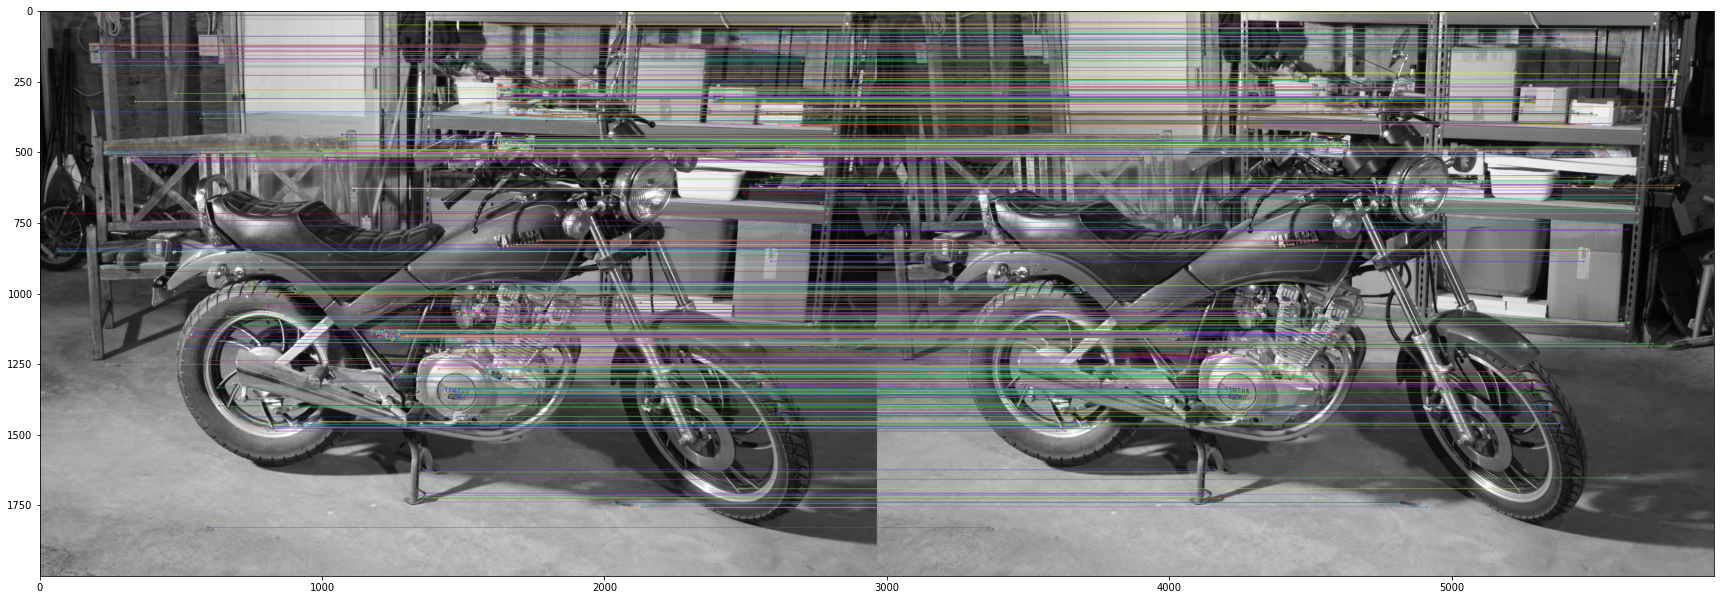

(<matplotlib.image.AxesImage at 0x1e70eb206d0>, None)

In [17]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()